Total samples: 516
Total treatment group: 248
Total control group: 268
Total treatment responders: 194
Total treatment nonresponders: 54
Total control responders: 108
Total control nonresponders: 160
T8 treatment responders: 97
T8 control responders: 54
Raw p-values:
hsa-let-7a-3p      0.88734
hsa-let-7a-5p     0.730579
hsa-let-7b-3p     0.123138
hsa-let-7b-5p     0.783948
hsa-let-7c-5p     0.626574
                    ...   
hsa-miR-942-5p    0.936154
hsa-miR-96-5p     0.840176
hsa-miR-98-5p     0.685952
hsa-miR-99a-5p    0.956948
hsa-miR-99b-5p    0.254151
Name: p_value, Length: 281, dtype: object
Differential expression analysis complete. Results saved to CSV files.


/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

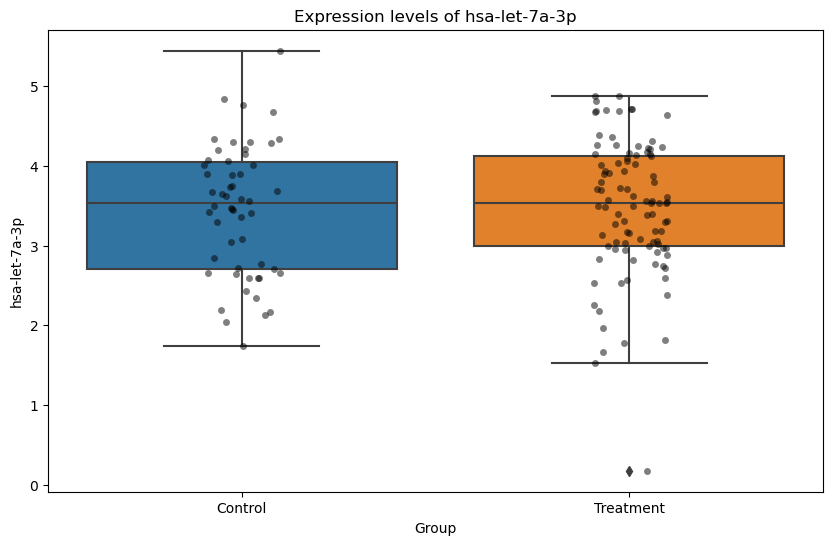

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

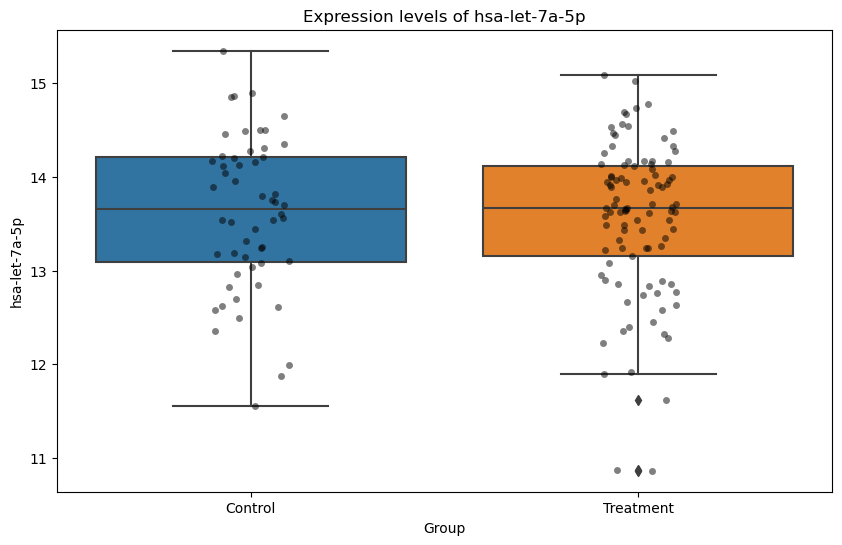

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

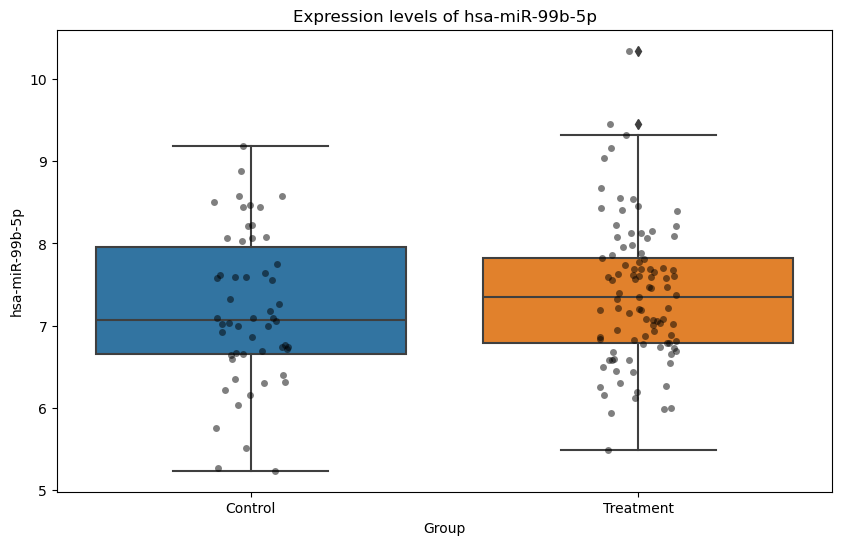

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import pandas as pd
import numpy as np

# Load the data
file_path = '/Users/emmetthintz/Documents/Computational-Biology/Data/GSE97154_Cleaned.csv'
data = pd.read_csv(file_path)

# Separate groups
treatment_group = data[data['Treatment'] == 1]
control_group = data[data['Treatment'] == 0]

# Further separate treatment group into responders and nonresponders
treatment_responders = treatment_group[treatment_group['Response'] == 1]
treatment_nonresponders = treatment_group[treatment_group['Response'] == 0]

# Further separate control group into responders and nonresponders (if applicable)
control_responders = control_group[control_group['Response'] == 1]
control_nonresponders = control_group[control_group['Response'] == 0]

# Filter data to only include T8 time point
t8_treatment_responders = treatment_responders[treatment_responders['Timepoint'] == 'T8']
t8_control_responders = control_responders[control_responders['Timepoint'] == 'T8']

# Print lengths of groups
print(f"Total samples: {len(data)}")
print(f"Total treatment group: {len(treatment_group)}")
print(f"Total control group: {len(control_group)}")
print(f"Total treatment responders: {len(treatment_responders)}")
print(f"Total treatment nonresponders: {len(treatment_nonresponders)}")
print(f"Total control responders: {len(control_responders)}")
print(f"Total control nonresponders: {len(control_nonresponders)}")
print(f"T8 treatment responders: {len(t8_treatment_responders)}")
print(f"T8 control responders: {len(t8_control_responders)}")

def perform_t_tests(group1, group2):
    miRNA_columns = group1.columns[5:]  # miRNA expression columns
    results = pd.DataFrame(index=miRNA_columns, columns=['p_value', 'corrected_p_value', 'Direction'])

    for miRNA in miRNA_columns:
        group1_values = group1[miRNA].values
        group2_values = group2[miRNA].values
        
        # Check for NaN values
        if np.isnan(group1_values).any() or np.isnan(group2_values).any():
            print(f"NaN values found in miRNA: {miRNA}")
            continue
        
        # Perform t-test
        t_stat, p_val = ttest_ind(group1_values, group2_values, equal_var=False, nan_policy='omit')
        results.loc[miRNA, 'p_value'] = p_val
        results.loc[miRNA, 'Direction'] = 'Increase' if np.mean(group2_values) > np.mean(group1_values) else 'Decrease'

    # Print raw p-values before correction
    print("Raw p-values:")
    print(results['p_value'].dropna())
    
    # Adjust p-values using Benjamini-Hochberg
    corrected_p_values = multipletests(results['p_value'].dropna(), alpha=0.05, method='fdr_bh')[1]
    results.loc[results['p_value'].dropna().index, 'corrected_p_value'] = corrected_p_values
    
    return results[results['corrected_p_value'] < 0.05]

# Perform the analysis between T8 control responders and T8 treatment responders
significant_differential_expression = perform_t_tests(t8_control_responders, t8_treatment_responders)

# Add response information to the results
significant_differential_expression['Response'] = 1  # since we are comparing responders

# Sort by corrected p-value
significant_differential_expression = significant_differential_expression.sort_values('corrected_p_value')

# Save the results to a CSV file
output_dir = './data/'
significant_differential_expression.to_csv(f'{output_dir}significant_differential_expression_t8_responders.csv', index=True)

print("Differential expression analysis complete. Results saved to CSV files.")
# Select a few miRNAs to visualize
selected_miRNAs = ['hsa-let-7a-3p', 'hsa-let-7a-5p', 'hsa-miR-99b-5p']

# Combine the two groups for visualization
combined_data = pd.concat([t8_control_responders, t8_treatment_responders])
combined_data['Group'] = np.where(combined_data['Treatment'] == 1, 'Treatment', 'Control')

for miRNA in selected_miRNAs:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Group', y=miRNA, data=combined_data)
    sns.stripplot(x='Group', y=miRNA, data=combined_data, jitter=True, color='black', alpha=0.5)
    plt.title(f'Expression levels of {miRNA}')
    plt.show()